In [1]:
source('../../source/basic.r')

source('../validataion.r')


Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”


In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(Signac)
    library(Seurat)
    library(GenomeInfoDb)
    library(EnsDb.Hsapiens.v86 )# hg38
   # library(EnsDb.Hsapiens.v75) #hg19
    library(ggplot2)
    library(patchwork)
    library(data.table)
    library(Matrix)
    set.seed(1234)
})

# peak data

## read data

In [150]:
counts <- readMM("data/d53_fetal_filtered_peak_bc_matrix/matrix.mtx") 


In [151]:
counts%>%dim

[1] 143850   5471

In [152]:
colnames(counts) <- fread('data/d53_fetal_filtered_peak_bc_matrix/barcodes.tsv',header = FALSE)%>%
                    pull(V1)

rownames(counts) <- fread('data/d53_fetal_filtered_peak_bc_matrix/peaks.bed')%>%mutate(name=paste0(V1,':',V2,'-',V3))%>%pull(name)

In [153]:
counts[1:3,1:3]

3 x 3 sparse Matrix of class "dgTMatrix"
                   AAACGAACAAAGGAAG-1 AAACGAACACTGTTAG-1 AAACGAACATCCCTTG-1
chr1:190629-191692                  .                  .                  .
chr1:267837-268171                  .                  .                  .
chr1:629733-630168                  .                  .                  .

In [154]:
metadata <- fread('data/raw/GSM5585602_d53_fetal_metadata.csv.gz')

In [155]:
metadata%>%dim

[1] 4884   44

### subset using metadata

In [158]:
counts.sub <- counts[,intersect(metadata$V1,colnames(counts))]

In [159]:
counts.sub[1:3,1:3]

3 x 3 sparse Matrix of class "dgTMatrix"
                   AGCCGCAGTGGCGCTT-1 TTCGGTCCACGATTAC-1 AGCGTATTCTTAACGG-1
chr1:190629-191692                  3                  2                  2
chr1:267837-268171                  .                  .                  .
chr1:629733-630168                  .                  .                  .

In [160]:
metadata.sub <- metadata%>%dplyr::filter(V1%in%intersect(metadata$V1,colnames(counts)))%>%column_to_rownames('V1')

## build seurat object

In [161]:
chrom_assay <- CreateChromatinAssay(
  counts = counts.sub,
  sep = c(":", "-"),
  genome = 'hg38',
  fragments = './data/fragments/GSM5585602_d53_fetal_fragments.tsv.gz',
  min.cells = 0,
  min.features = 0
)


Computing hash



In [162]:
seurat.object.all <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata.sub
)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [163]:
seurat.object.all

An object of class Seurat 
143850 features across 4883 samples within 1 assay 
Active assay: peaks (143850 features, 0 variable features)

In [164]:
seurat.object <- subset(seurat.object.all, cells = rownames(metadata.sub))

In [165]:
seurat.object

An object of class Seurat 
143850 features across 4883 samples within 1 assay 
Active assay: peaks (143850 features, 0 variable features)

In [166]:
seurat.object <- RunTFIDF(seurat.object)
seurat.object <- FindTopFeatures(seurat.object, min.cutoff = 'q0')
seurat.object <- RunSVD(seurat.object)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



In [167]:
psize(4,4)

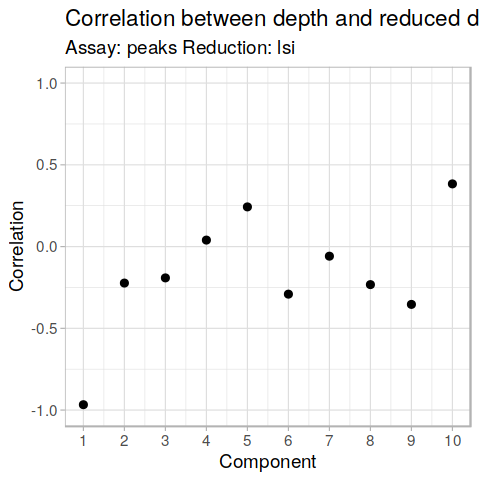

In [168]:
DepthCor(seurat.object)

In [169]:
suppressMessages({
    
    seurat.object <- RunUMAP(object = seurat.object, reduction = 'lsi', dims = 2:30)
    seurat.object <- FindNeighbors(object = seurat.object, reduction = 'lsi', dims = 2:30)
    seurat.object <- FindClusters(object = seurat.object, verbose = FALSE, algorithm = 3)
    # p.umpa.cluster = DimPlot(object = seurat.object, label = TRUE) + NoLegend()
    
})


In [170]:
p.umpa.cluster = DimPlot(object = seurat.object, label = TRUE) + NoLegend()

In [171]:
psize()

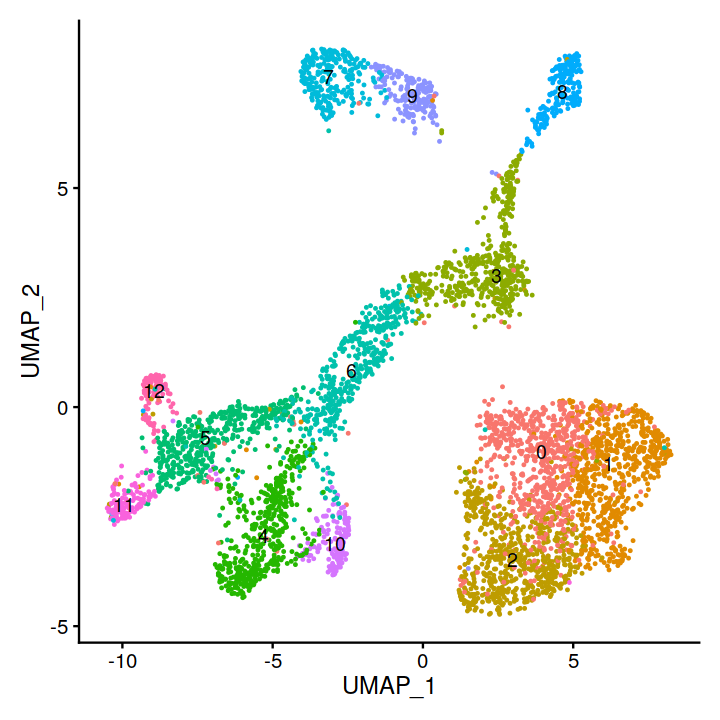

In [172]:
p.umpa.cluster

In [173]:
p.umpa.label = DimPlot(object = seurat.object,group.by='short_type',label = TRUE) + NoLegend()

In [174]:
psize(6,6)

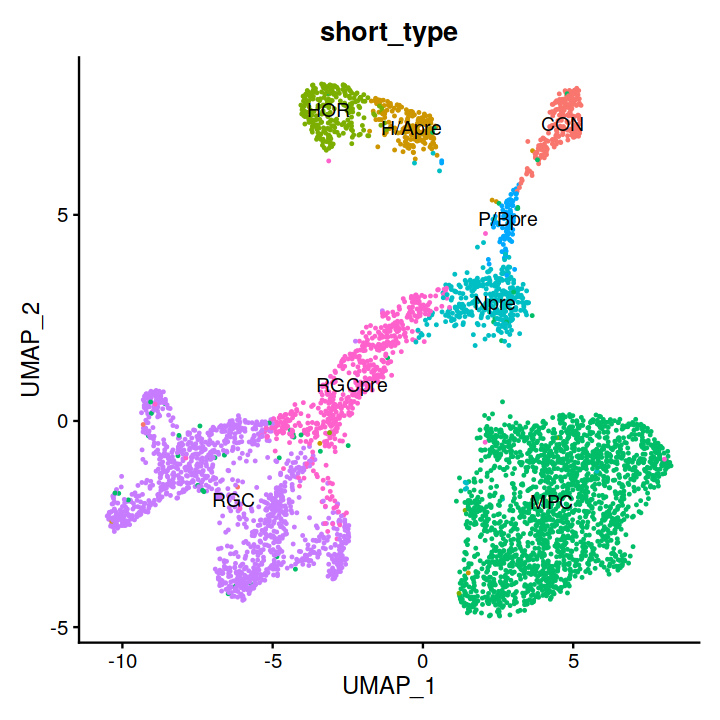

In [175]:
p.umpa.label

In [198]:

p.umpa.label2 = FeaturePlot(object = seurat.object,features='pseudotime',label = FALSE) + NoLegend()

In [199]:
psize(10,10)

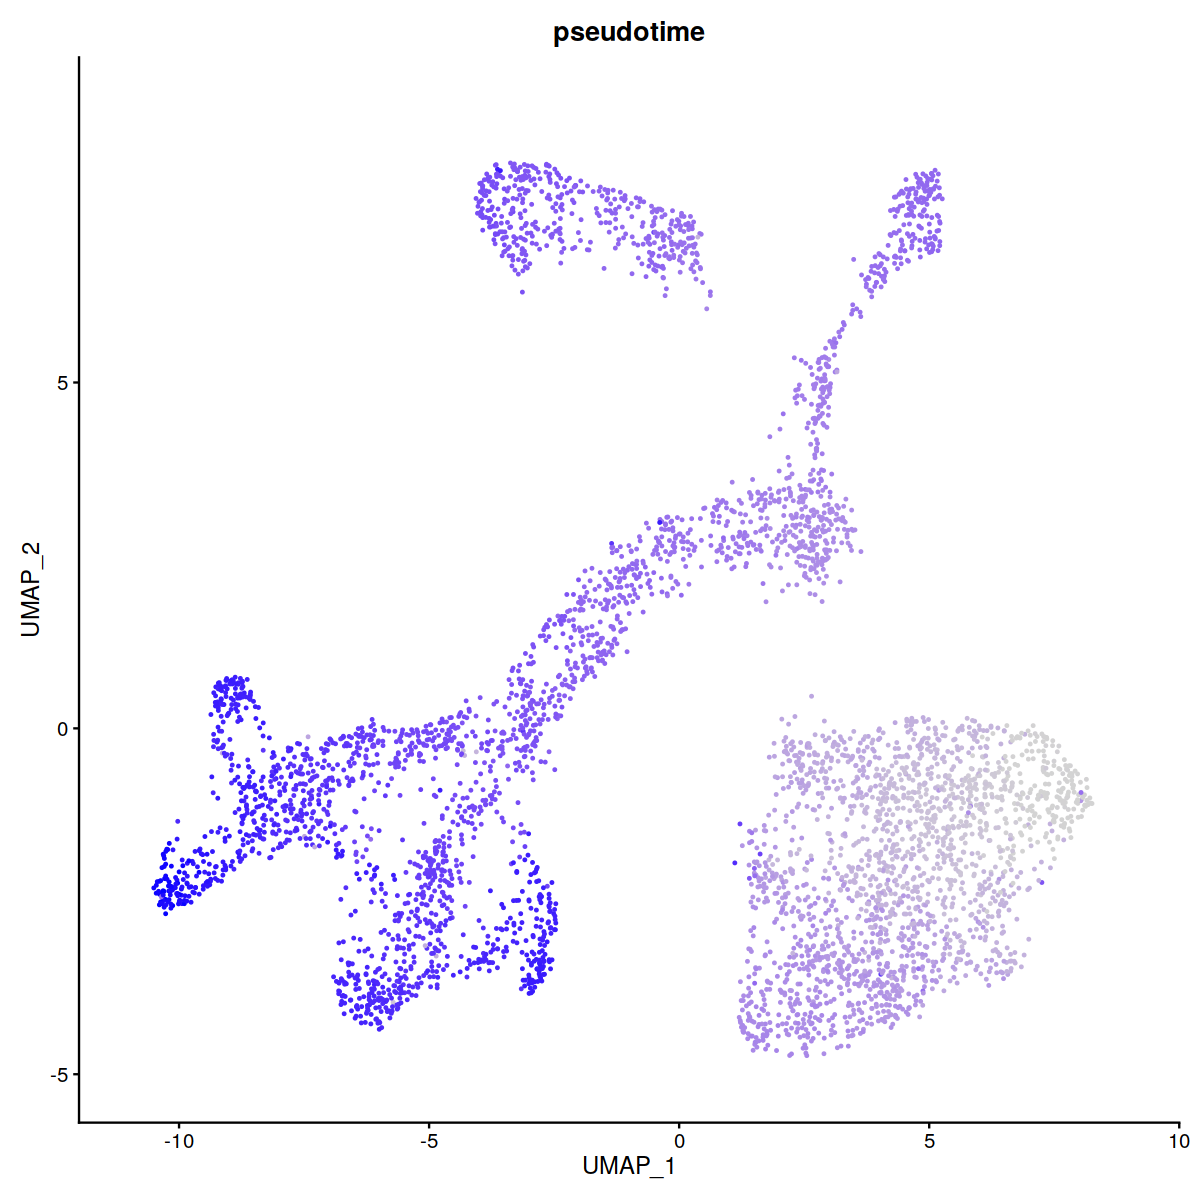

In [200]:
p.umpa.label2

# cPeaks

## read data

In [67]:
counts <- readMM("data/d53_fetal_filtered_peak_bc_matrix/matrix.cpeak.mtx") 


In [68]:
counts%>%dim

[1] 1568814    5471

In [70]:
colnames(counts) <- fread('data/d53_fetal_filtered_peak_bc_matrix/barcodes.tsv',header = FALSE)%>%
                    pull(V1)

rownames(counts) <- fread('data/cpeak.bed')%>%mutate(name=paste0(V1,':',V2,'-',V3))%>%pull(name)

In [71]:
counts[1:3,1:3]

3 x 3 sparse Matrix of class "dgTMatrix"
                 AAACGAACAAAGGAAG-1 AAACGAACACTGTTAG-1 AAACGAACATCCCTTG-1
chr1:9919-10727                   .                  .                  .
chr1:11043-11422                  .                  .                  .
chr1:13249-13832                  .                  .                  .

In [72]:
metadata <- fread('data/raw/GSM5585602_d53_fetal_metadata.csv.gz')

In [73]:
metadata%>%dim

[1] 4884   44

### subset using metadata

In [75]:
counts.sub <- counts[,intersect(metadata$V1,colnames(counts))]

In [76]:
counts.sub[1:3,1:3]

3 x 3 sparse Matrix of class "dgTMatrix"
                 AGCCGCAGTGGCGCTT-1 TTCGGTCCACGATTAC-1 AGCGTATTCTTAACGG-1
chr1:9919-10727                   .                  .                  .
chr1:11043-11422                  .                  .                  .
chr1:13249-13832                  .                  .                  .

In [77]:
metadata.sub <- metadata%>%dplyr::filter(V1%in%intersect(metadata$V1,colnames(counts)))%>%column_to_rownames('V1')

## build seurat object

In [128]:
chrom_assay <- CreateChromatinAssay(
  counts = counts.sub,
  sep = c(":", "-"),
  genome = 'hg38',
  fragments = './data/fragments/GSM5585602_d53_fetal_fragments.tsv.gz',
  min.cells = 0,
  min.features = 0
)


Warning message in CreateChromatinAssay(counts = counts.sub, sep = c(":", "-"), :
"Overlapping ranges supplied. Ranges should be non-overlapping."
Computing hash



In [129]:
seurat.object.cpeak.all <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata.sub
)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [130]:
seurat.object.cpeak.all

An object of class Seurat 
1568814 features across 4883 samples within 1 assay 
Active assay: peaks (1568814 features, 0 variable features)

In [131]:
seurat.object.cpeak <- subset(seurat.object.cpeak.all, cells = rownames(metadata.sub))

In [132]:
seurat.object.cpeak

An object of class Seurat 
1568814 features across 4883 samples within 1 assay 
Active assay: peaks (1568814 features, 0 variable features)

In [133]:
seurat.object.cpeak <- RunTFIDF(seurat.object.cpeak)
seurat.object.cpeak <- FindTopFeatures(seurat.object.cpeak, min.cutoff = 'q0')


Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"


In [134]:
seurat.object.cpeak <- RunSVD(seurat.object.cpeak)

Running SVD

Scaling cell embeddings



In [135]:
psize(4,4)

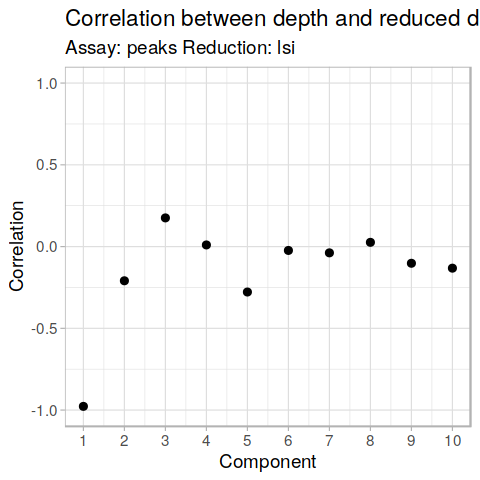

In [136]:
DepthCor(seurat.object.cpeak)

In [137]:
suppressMessages({
    
    seurat.object.cpeak <- RunUMAP(object = seurat.object.cpeak, reduction = 'lsi', dims = 2:30)
    seurat.object.cpeak <- FindNeighbors(object = seurat.object.cpeak, reduction = 'lsi', dims = 2:30)
    seurat.object.cpeak <- FindClusters(object = seurat.object.cpeak, verbose = FALSE, algorithm = 3)
    # p.umpa.cluster = DimPlot(object = seurat.object, label = TRUE) + NoLegend()
    
})


In [138]:
p.umpa.cluster.cpeak = DimPlot(object = seurat.object.cpeak, label = TRUE) + NoLegend()

In [139]:
psize()

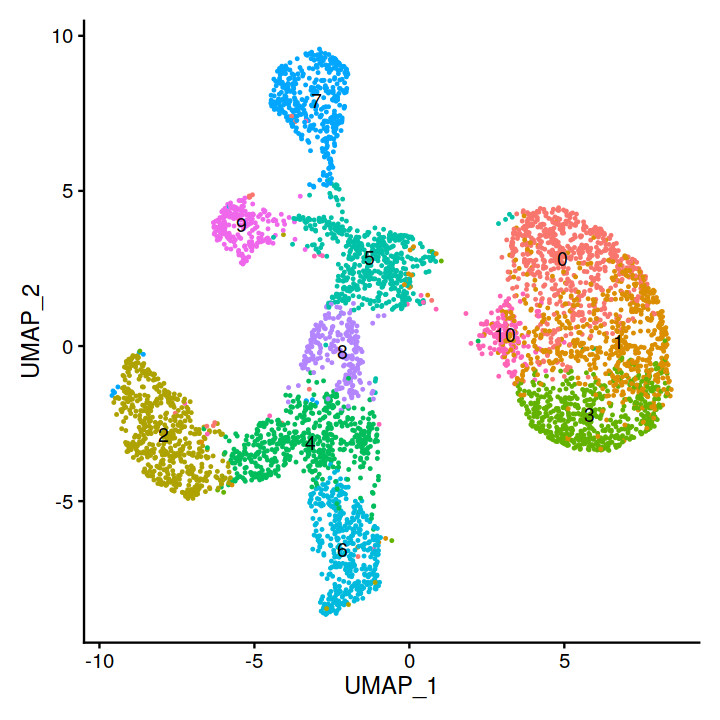

In [140]:
p.umpa.cluster.cpeak

In [208]:
p.umpa.label.cpeak = DimPlot(object = seurat.object.cpeak,group.by='short_type',label = TRUE) + NoLegend()

In [209]:
psize(6,6)

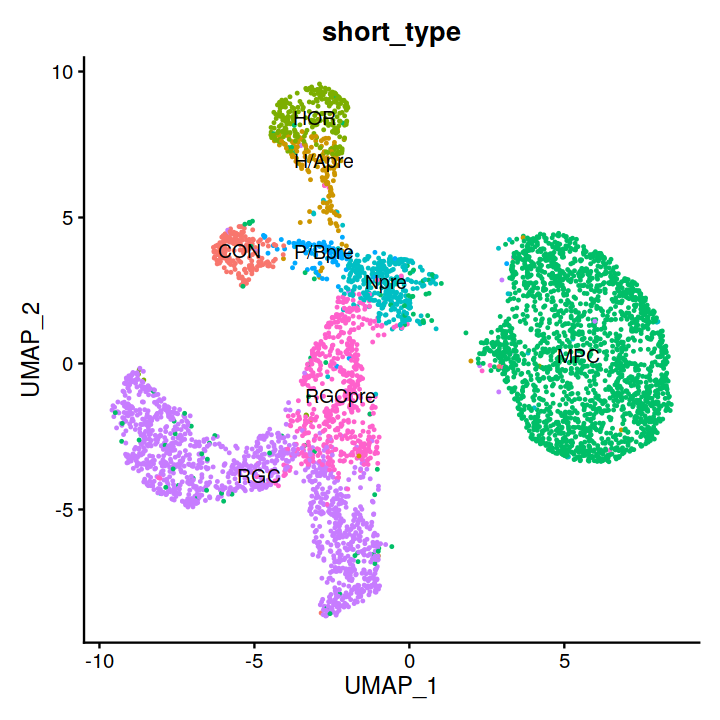

In [210]:
p.umpa.label.cpeak

In [205]:

p.umpa.label2.cpeak = FeaturePlot(object = seurat.object.cpeak,features='pseudotime',label = FALSE) + NoLegend()

In [206]:
psize(6,6)

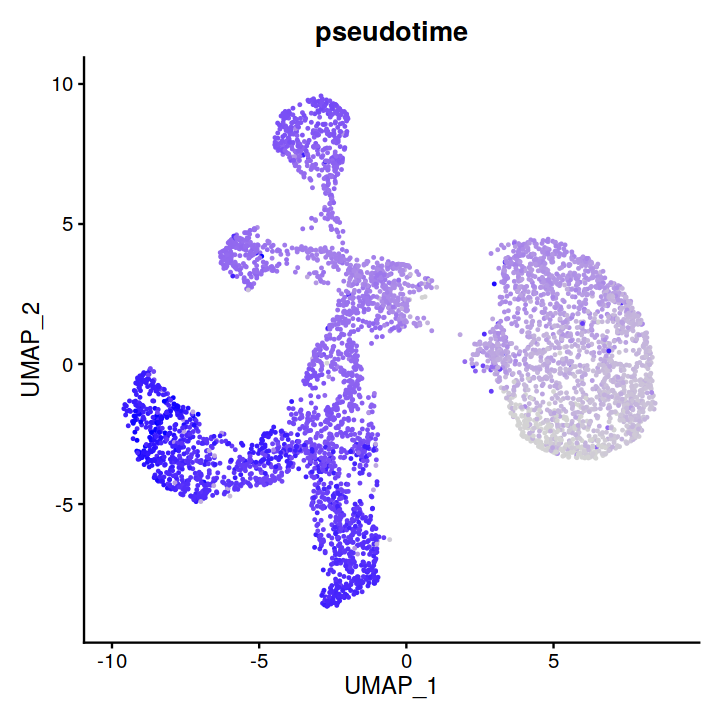

In [207]:
p.umpa.label2.cpeak 

# save 

In [ ]:
save.image('image/fw8.image')

In [179]:
seurat.objct.list <- list(peaks=seurat.object, cpeaks=seurat.object.cpeak)

In [180]:
qsave(seurat.objct.list,'rds/fw8.seurat.objct.list.qs')

In [3]:
seurat.objct.list=qread('rds/fw8.seurat.objct.list.qs')

In [4]:
p.umpa.label.cpeak = DimPlot(object = seurat.objct.list$cpeaks,group.by='short_type',label = TRUE) + NoLegend()

In [5]:
psize(6,6)

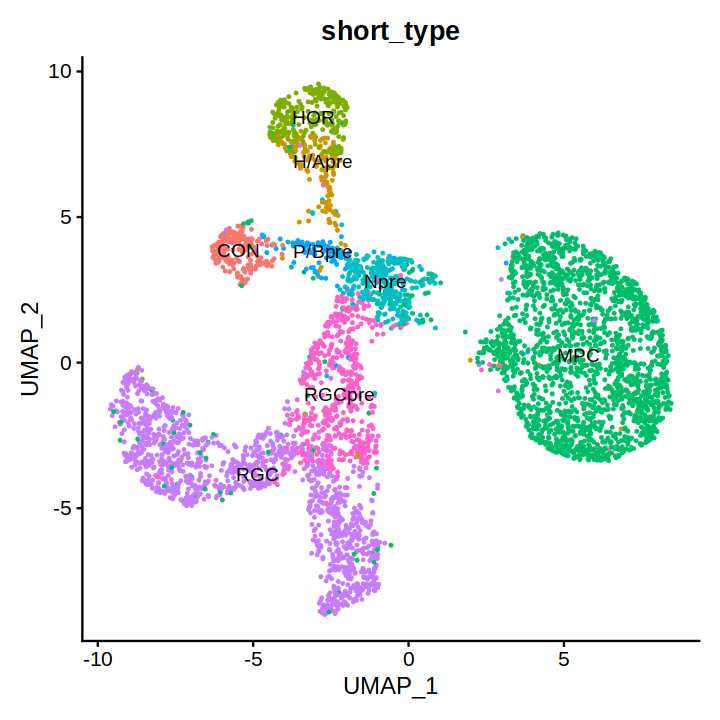

In [6]:
p.umpa.label.cpeak

In [8]:
ggsave(paste0('plot/fw8.cpeak.umpa.label.pdf'),height = 6,width = 6)

In [181]:
psize(6,6)

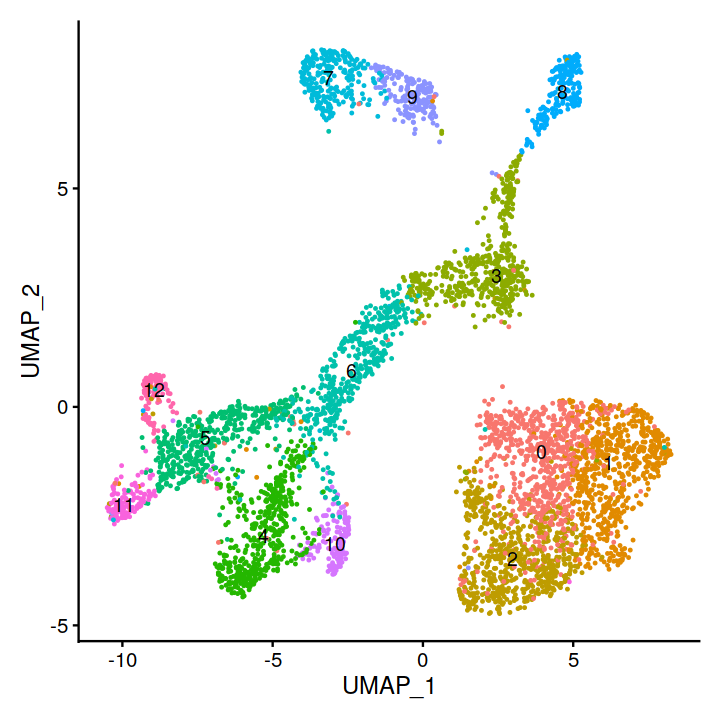

In [182]:
p.umpa.cluster+theme(aspect.ratio = 1) 

In [183]:
ggsave(paste0('plot/fw8.peak.umpa.cluster.pdf'),height = 6,width = 6)

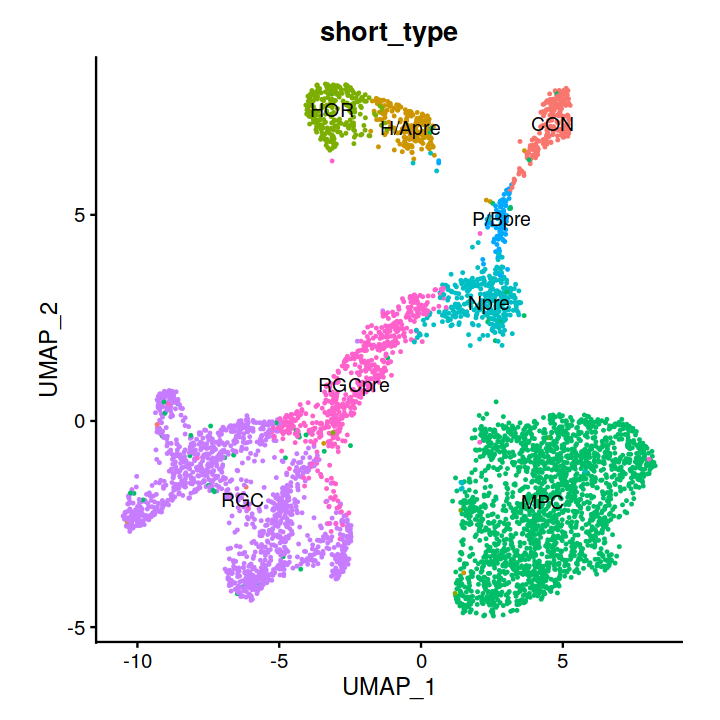

In [184]:
p.umpa.label+theme(aspect.ratio = 1) 

In [185]:
ggsave(paste0('plot/fw8.peak.umpa.label.pdf'),height = 6,width = 6)

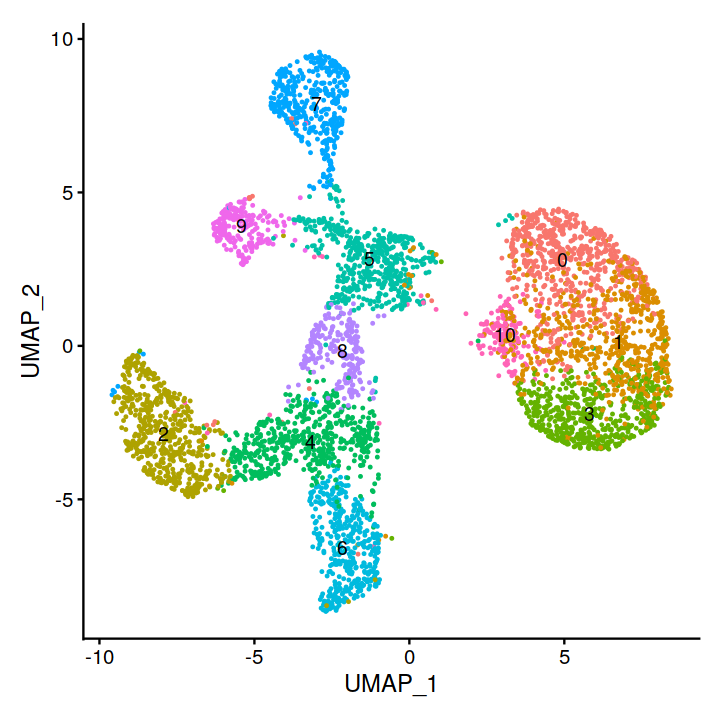

In [186]:
p.umpa.cluster.cpeak+theme(aspect.ratio = 1) 

In [187]:
ggsave(paste0('plot/fw8.cpeak.umpa.cluster.pdf'),height = 6,width = 6)

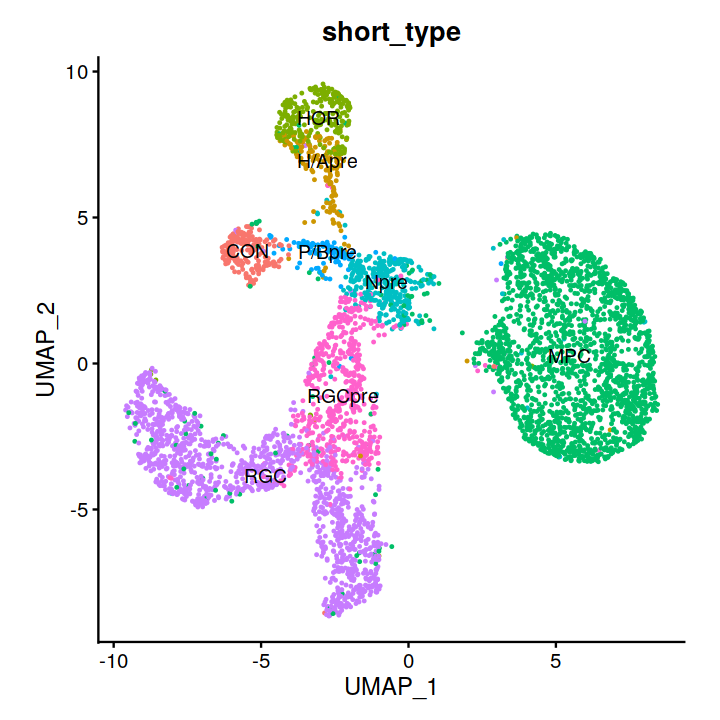

In [188]:
p.umpa.label.cpeak+theme(aspect.ratio = 1) 

In [189]:
ggsave(paste0('plot/fw8.cpeak.umpa.label.pdf'),height = 6,width = 6)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


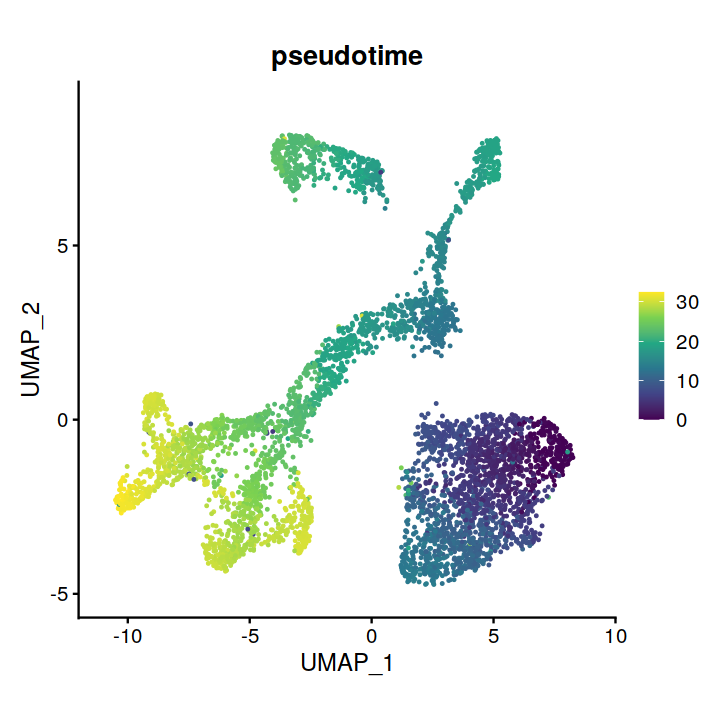

In [219]:
p.umpa.label2+theme(aspect.ratio = 1,legend.position = 'right') + scale_color_continuous(type = "viridis")

In [220]:
ggsave(paste0('plot/fw8.peak.umpa.time.pdf'),height = 6,width = 10)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


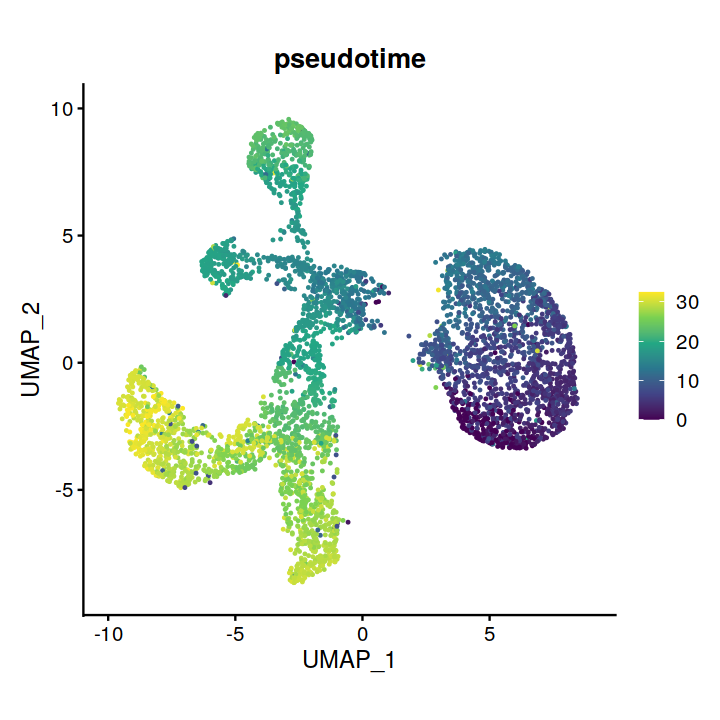

In [221]:
p.umpa.label2.cpeak+theme(aspect.ratio = 1,legend.position = 'right') + scale_color_continuous(type = "viridis")

In [222]:
ggsave(paste0('plot/fw8.cpeak.umpa.time.pdf'),height = 6,width = 10)